<a href="https://colab.research.google.com/github/AndrewMarksArt/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def mean_var_stdev (l):
  """
  mean_var_stdev returns the mean, variance and stdev of a list l 
  l: list 
  return: mean, variance, standard deviation 
  """
  N = len(l)
  m = sum(l)/N
  v_sq_dist = [(l[i]-m)**2 for i in range(N)]
  v = sum(v_sq_dist)/N
  std = np.sqrt(v)
  return m, v, std

In [17]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
sales_stats = mean_var_stdev(sales)
print(f' mean: {stats[0]}\n variance: {stats[1]}\n standard deviation: {stats[2]}')

 mean: 3052.714285714286
 variance: 183761.06122448976
 standard deviation: 428.67360686714756


In [0]:
sales_stddev = sales_stats[-1]

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [0]:
df = pd.DataFrame()

In [0]:
df['sales'] = sales
df['num_customers'] = customers

In [7]:
df.T

,0,1,2,3,4,5,6
sales,3505,2400,3027,2798,3700,3250,2689
num_customers,127,80,105,92,120,115,93


In [12]:
covariance = df.cov()
covariance

,sales,num_customers
sales,214387.904762,7604.357143
num_customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [11]:
customer_stats = mean_var_stdev(customers)
customer_stddev = customer_stats[-1]
print(customer_stddev)

15.792015549069118


In [23]:
df.corr()

,sales,num_customers
sales,1.000000,0.962834
num_customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [24]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [25]:
titanic.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [28]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [29]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

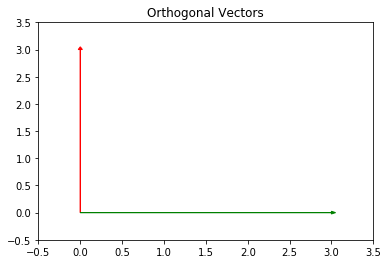

In [70]:
vector_1 = [0, 3]
vector_2 = [3, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-0.5,3.5)          
plt.ylim(-0.5,3.5)
plt.title("Orthogonal Vectors")
plt.show()

Synonym for orthogonal is perpendicular, the vectors are perpendicular and form a right angle.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [47]:
a = np.array([[-5],
              [ 3],
              [ 7]])
b = np.array([[ 6],
              [-8],
              [ 2]])
print(np.shape(a), np.shape(b))
print(np.vdot(a,b))

(3, 1) (3, 1)
-40


a and b are not orthogonal because their dot product doesn't equal 0 

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [59]:
c = np.array([2, -15, 6, 20])
print(np.linalg.norm(c)**2)
print(c.dot(c))
print(sum(c.T*c))

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\n
\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8\end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\1 \end{bmatrix} = 2\hat{i} + 11\hat{j} -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [68]:
f = np.array([4,12,11,9,2])
norm = np.linalg.norm(f)
unit_f = (1/norm)*f
print(unit_f)

# unit vectors length should = 1
print(np.linalg.norm(unit_f))

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

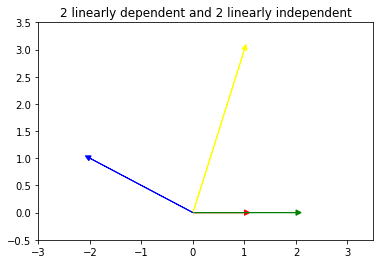

In [74]:
red = [1,0]
green = [2,0]
yellow = [1,3]
blue = [-2,1]

plt.arrow(0,0, red[0], red[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(0,0, green[0], green[1],head_width=.1, head_length=0.1, color ='green')
plt.arrow(0,0, yellow[0], yellow[1],head_width=.1, head_length=0.1, color ='yellow')
plt.arrow(0,0, blue[0], blue[1],head_width=.1, head_length=0.1, color ='blue')
plt.xlim(-3,3.5)          
plt.ylim(-0.5,3.5)
plt.title("2 linearly dependent and 2 linearly independent")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

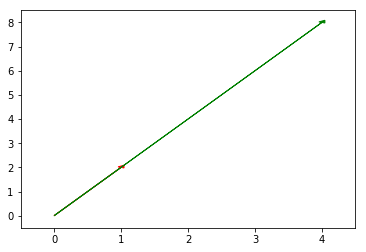

In [81]:
g = np.array([1,2])
h = np.array([4,8])

plt.arrow(0,0, g[0], g[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(0,0, h[0], h[1],head_width=.1, head_length=0.1, color ='green')
plt.xlim(-.5,4.5)          
plt.ylim(-.5,8.5)
plt.show()

g and h are linearly dependent and cannot span R^2

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

l, m, n are linearly independent so they span all of R^3 space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



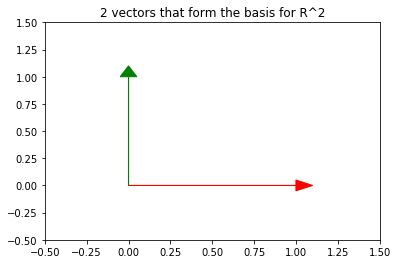

In [75]:
red = [1,0]
green = [0,1]

plt.arrow(0,0, red[0], red[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(0,0, green[0], green[1],head_width=.1, head_length=0.1, color ='green')
plt.xlim(-.5,1.5)          
plt.ylim(-.5,1.5)
plt.title("2 vectors that form the basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

The basis of a space is a set of vectors that are linearly independent because they can span the space, they can fill the entire space with their linear combinations.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

step 1: add row 1 to row 2

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

step 2: multiply row 1 by 4 and substract row 1 from row 3

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

step 3: divide row 2 by 2

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

step 4: divide row 3 by -10

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & 1
\end{bmatrix}
\end{align}

Rank 3


In [84]:
P = np.array([[1,2,3], [-1,0,7], [4,8,2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

property of a matrix that tells us the dimension of the vector space spanned by its column vectors.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

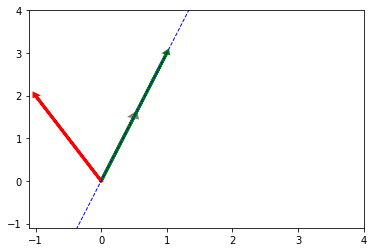

In [99]:
v = np.array([1,3])
w = np.array([-1,2])
proj = (w.dot(v)/v.dot(v))*v

# Plot a line

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.1, head_length=0.1, color ='grey')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

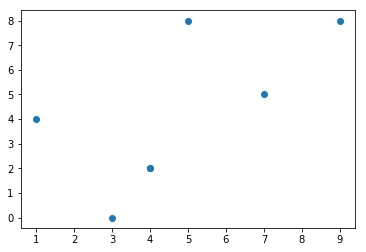

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()